<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/06_logistic_regression/4_logistic_regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

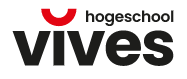<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# ONS TWEEDE NEURAAL NETWERK IN KERAS

Een perceptron of logistic regression model kunnen we ook met een artificiële neurale netwerk trainen. Net als de lineaire regressie, zijn perceptron en logistic regression netwerken met één neuron. Bij perceptron en logistic regression moet je wel een activatiefunctie definiëren voor dat neuron: bij perceptron de Heaviside stapfunctie en bij logistic regression de sigmoïdefunctie.

In deze notebook demonstreren we dit door onze "covid" dataset te fitten m.b.v. [Keras](https://keras.io/), een Python interface voor Deep Learning, die gebruik maakt van TensorFlow, Google Brain's Machine Learning library. In het vak Deep Learning gaan we dieper in op neurale netwerken en daar gebruiken we ook Keras.

We demonstreren enkel logistic regression, omdat de Heaviside functie volgens de Keras [documentatie](https://keras.io/api/layers/activations/#available-activations) niet standaard aanwezig is in Keras. Je kan hem wel zelf definiëren en toevoegen, maar dat is te gevorderd, dus gaan we gewoon de sigmoïdefunctie gebruiken, die wel standaard is ingebouwd, zodat we logistic regression toepassen.

## De Covid dataset

We lezen de "Covid" dataset in als Pandas DataFrame:

In [ ]:
import pandas as pd

covid = pd.read_csv("covid.csv", sep=";")
covid.head()

,Patient (P),Cough (C),Fever (F),Difficulty breathing (B),Tiredness (T),Diagnosis (D)
0,1,NaN,X,X,X,sick
1,2,X,X,NaN,X,sick
2,3,X,NaN,X,X,sick
3,4,X,X,X,NaN,sick
4,5,X,NaN,NaN,X,healthy


We extraheren de features en de kolom met labels:

In [ ]:
import numpy as np

y = (covid['Diagnosis (D)'] == "sick").values.astype(int)
X = covid.drop(labels=['Patient (P)', 'Diagnosis (D)'], axis=1).values
X[X=="X"] = 1
X = X.astype(float)
X[np.isnan(X)] = 0

print(X)
print()
print(y)

[[0. 1. 1. 1.]
 [1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

[1 1 1 1 0 0 0 0]


Keras modellen verwachten 2D arrays als input: de rijen zijn het aantal samples, de kolommen de features.

In [ ]:
y = y[:, np.newaxis]

## Keras `Sequential` model definiëren

Voor logistische regressie hebben we dus een neuraal netwerk nodig met slechts één neuron. In Keras definiëren we daarvoor een `Sequential` model met 1 `Dense` layer die 1 node bevat. De layer heeft als `activation` de `'sigmoid'` functie.

In [ ]:
from tensorflow import keras
from keras import Sequential, layers

model = Sequential()  # Sequential is een klasse die we moeten instantiëren
model.add(layers.Dense(1, activation='sigmoid'))  # met add kunnen we een Dense layer toevoegen met 1 node en sigmoïdefunctie

## Keras model compileren

Tijdens het compileren van het model geven we de optimizer op. We nemen hier Stochastic Gradient Descent (SGD) met learning rate gelijk aan 0.1. We moeten ook een loss functie opgeven; we nemen hier de log loss of `binary_crossentropy`.

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)  # SGD is ook een klasse die we moeten instantiëren
model.compile(optimizer=sgd, loss="binary_crossentropy")

## Keras model trainen

Net als in Scikit-Learn moet je in Keras de `fit` methode van het model aanroepen om het te trainen. De eerste twee argumenten zijn uiteraard de examples en labels. We geven ook de batch size op, die we hier gelijk aan 1 nemen, wat wil zeggen dat we de datapunten één voor één gaan doorlopen. We geven ook het aantal epochs op. De `fit` methode retourneert een `History` object waarin we o.a. de waarden van de loss functie na elke epoch kunnen terugvinden.

In [ ]:
history = model.fit(X, y, batch_size=1, epochs=1000);

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.0728
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.9055
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.8139
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7706
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7434
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7209
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7046
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6754
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6618
Epoch 11/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6502
Epoch 12/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6365
Epoch 13/1000
8/8 [==============================

Laten we de loss eens plotten in functie van het aantal epochs:

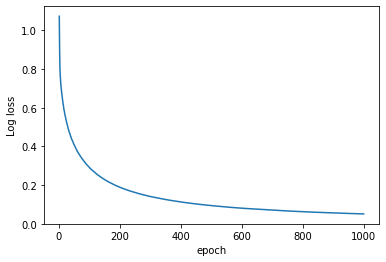

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = np.arange(1, len(loss)+1)
plt.plot(epochs, loss);
plt.xlabel('epoch');
plt.ylabel('Log loss');

We zien dat de loss functie alsmaar kleiner wordt. Omdat logistic regression kansen als output heeft, wordt die echter nooit nul!

In een neuraal netwerk netwerk worden de parameters ook gewichten genoemd. We vinden die terug in attribuut `weights` van ons model object. In dit geval is het het tweede gewicht de intercept, wat hier "bias" wordt genoemd. De gewichten worden als TensorFlow variabelen opgeslagen. Met de methode `numpy` kunnen we ze omzetten naar NumPy arrays.

In [ ]:
model.weights[0].numpy().flatten()  # weights

array([5.261493 , 5.2286215, 5.260208 , 5.229877 ], dtype=float32)

In [ ]:
model.weights[1].numpy()[0]  # bias

-12.617877

## Voorspellingen maken

Net als in Scikit-Learn heeft het `Sequential` object een methode `predict` waarmee we voorspellingen kunnen doen. Maar in dit geval krijgen we dus kansen!

In [ ]:
prob = model.predict(X)
prob

array([[9.5692694e-01],
       [9.5697987e-01],
       [9.5826173e-01],
       [9.5821142e-01],
       [1.0654706e-01],
       [1.0630542e-01],
       [6.1747432e-04],
       [6.1824918e-04]], dtype=float32)

Die moeten we afronden om de echte predicties te krijgen:

In [ ]:
yp = np.round(prob)
yp

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

Checken of die inderdaad gelijk zijn aan de labels:

In [ ]:
yp == y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Alle labels worden dus juist voorspeld!

Is iemand die gewoon hoest ziek?

In [ ]:
model.predict(np.array([[1., 0., 0., 0.]]))[0, 0]

0.0006381273

Een heel kleine kans dus dat die ziek is...